<a href="https://colab.research.google.com/github/mhoch123/MAT422/blob/main/HW_4_1%2C4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4.1, 4.2
Authors: Megan Hoch and Bronwyn Curnow

# 4.1 Network Analysis Introduction


**Graph Models:** Any graph consists of both a set of objects (nodes) and connections between the nodes (edges). This is denoted as $G(V,E)$ where $V=\{ v_1, v_2, \ldots v_n \}$ representing the nodes and $E= \{ e_1, e_2, \ldots, e_m \} $ representing the edges. Size is denoted as $m=|E|$.

**Laplacian Matrix:** A graph with $n$ nodes is represented as a $ n x n$ adjacency matrix. A value 1 at row $i$, column $j$ in the adjacency matrix indicates a connection between notes $v_i$ and $v_j$.The Laplacian matrix $L$ of $G$ is an $n$ by $n$ symmetric matrix, with one row and column for each vertex such that:

$L_{ij} =
\left\{ \begin{array}{rcl}
\sum_k E_{ik} & \mbox{$i=j$} \\
-E_{ij} & \mbox{$i\neq j$ and $v_i$ is adjacent to $v_j$} \\
0 & \mbox{otherwise}
\end{array}\right.$

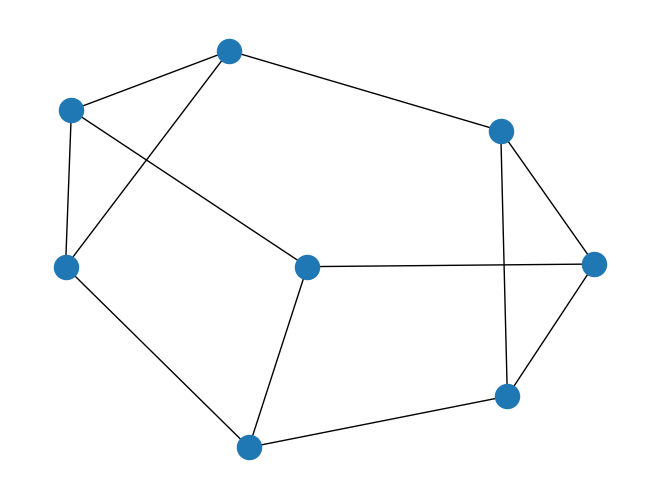

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs

Graph = nx.random_regular_graph(3,8)
nx.draw(Graph)

In [ ]:
def laplacian(adjacency_matrix):
    R = np.sum(adjacency_matrix, axis=1)
    degreeMatrix = np.diag(R)
    return degreeMatrix - adjacency_matrix

adj = nx.adjacency_matrix(Graph).toarray()
L = laplacian(adj)
print(adj)
print(L)

[[0 0 0 1 0 0 1 1]
 [0 0 1 0 0 1 1 0]
 [0 1 0 0 1 0 1 0]
 [1 0 0 0 0 1 0 1]
 [0 0 1 0 0 1 0 1]
 [0 1 0 1 1 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 0 0 1 1 0 0 0]]
[[ 3  0  0 -1  0  0 -1 -1]
 [ 0  3 -1  0  0 -1 -1  0]
 [ 0 -1  3  0 -1  0 -1  0]
 [-1  0  0  3  0 -1  0 -1]
 [ 0  0 -1  0  3 -1  0 -1]
 [ 0 -1  0 -1 -1  3  0  0]
 [-1 -1 -1  0  0  0  3  0]
 [-1  0  0 -1 -1  0  0  3]]


Here we have the adjacency matrix and Laplacian for our random graph. We see that the diagonal of the laplacian is 3 everywhere, since each node in our graph has a degree of 3.

[[0 1 1 1 1 1 0 1]
 [1 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 1]
 [1 0 0 0 1 0 1 0]
 [1 1 0 1 0 1 0 0]
 [1 1 0 0 1 0 1 0]
 [0 0 1 1 0 1 0 1]
 [1 0 1 0 0 0 1 0]]
[[ 6 -1 -1 -1 -1 -1  0 -1]
 [-1  3  0  0 -1 -1  0  0]
 [-1  0  3  0  0  0 -1 -1]
 [-1  0  0  3 -1  0 -1  0]
 [-1 -1  0 -1  4 -1  0  0]
 [-1 -1  0  0 -1  4 -1  0]
 [ 0  0 -1 -1  0 -1  4 -1]
 [-1  0 -1  0  0  0 -1  3]]


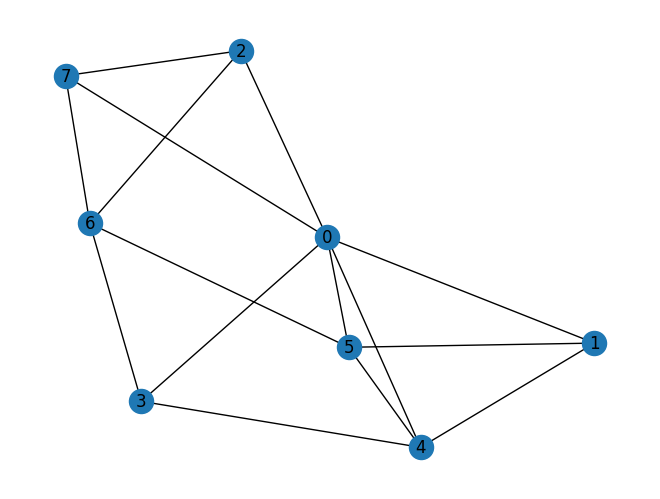

In [ ]:
G = nx.barabasi_albert_graph(8, 3)
nx.draw(G, with_labels = True)
adj_G = nx.adjacency_matrix(G).toarray()
L_G = laplacian(adj_G)
print(adj_G)
print(L_G)

In [ ]:
centralility = nx.eigenvector_centrality(G)
popular_node = max(centralility, key=centralility.get)
print('Most popular Node is:', popular_node)

Most popular Node is: 0


Now, we see a graph where each node does not have the same degree. We can create the adjacency matrix and Laplacian the same way, and now we can compute which node has the most connections.

#4.2 Spectral Graph Bipartitioning

Graph parition aims to fnd out a partition such that the cut is minimized. For a weighted graph $G=(V,E)$ given a bipartition of $V$ into disjoint $V_1$ and $V_2 (V_1 \cup V_2 = V)$, the cut between them can be defined as:

$cut(V_1, V_2) = \sum_{i\in V_1, j \in V_2} M_{ij}$

Partition 1: [1, 2, 4, 6]
Partition 2: [0, 3, 5, 7]


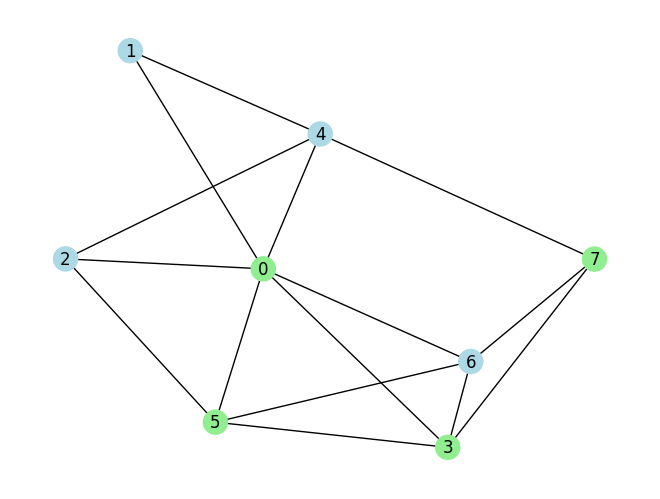

In [ ]:
L = L_G.astype(float)

eigvals, eigvectors = eigsh(L, k=2, which = 'SM')

fiedler_vector = eigvectors[:, 1]

partition_1 = [node for node, value in zip(G.nodes(), fiedler_vector) if value > 0]
partition_2 = [node for node, value in zip(G.nodes(), fiedler_vector) if value <= 0]

print("Partition 1:", partition_1)
print("Partition 2:", partition_2)

color_map = []
for node in G:
    if node in partition_1:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

nx.draw(G, node_color=color_map, with_labels=True)


Here we take the same graph from the previous code (finding the most popular node) and section it using spectral graph bipartitioning.

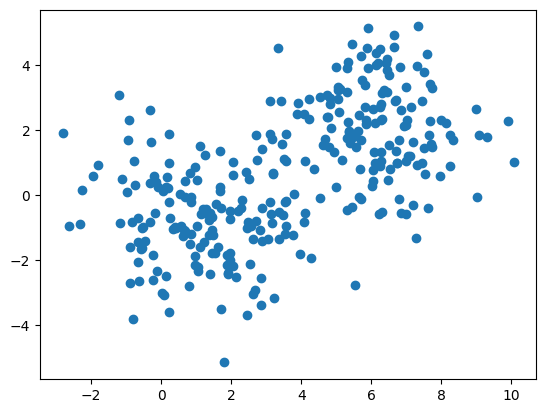

In [ ]:
x, _ = make_blobs(n_samples=300, centers=2, cluster_std=1.5)

plt.scatter(x[:,0], x[:,1])

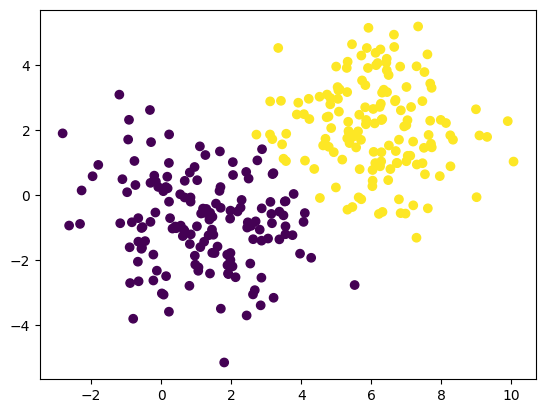

In [ ]:
sc = SpectralClustering(n_clusters = 2)
sc.fit(x)
labels = sc.labels_
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

We can do something similar given a random dataset with two centers, and use spectral clustering for n = 2 to bipartition the data.